In [23]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read in the data
df = pd.read_csv(r'C:\Users\CarsonEmery\Python Programs\Portfolio Proj\movies.csv')

In [3]:
# looking at data
df.head()

NameError: name 'df' is not defined

In [3]:
# for purposes of this project I am going to drop all rows with any Nan value, taking the data from around 7k observations to 5k.

df.dropna(how='any', inplace=True)

# checking for null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
# data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# changing the data type of certain columns to remove decimal points. 
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [2]:
df.head()

NameError: name 'df' is not defined

In [7]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [8]:
pd.set_option('display.max_rows', None)

In [9]:
#checking for duplicates and dropping them 

In [22]:
# df['company'].drop_duplicates().sort_values(ascending = False)
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0


<function matplotlib.pyplot.show(close=None, block=None)>

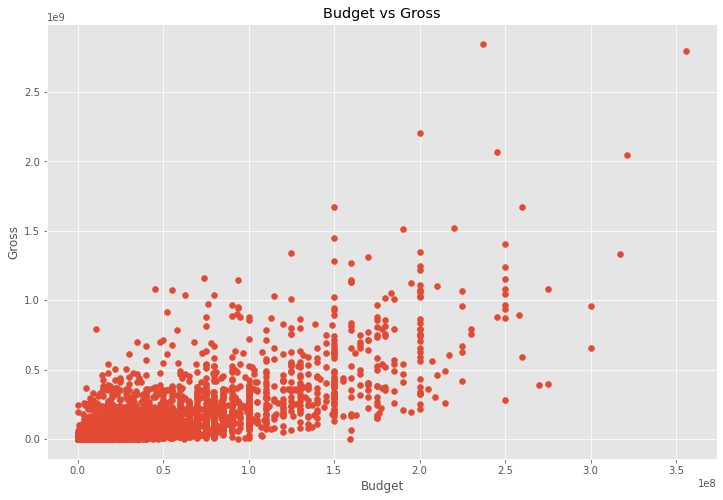

In [11]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

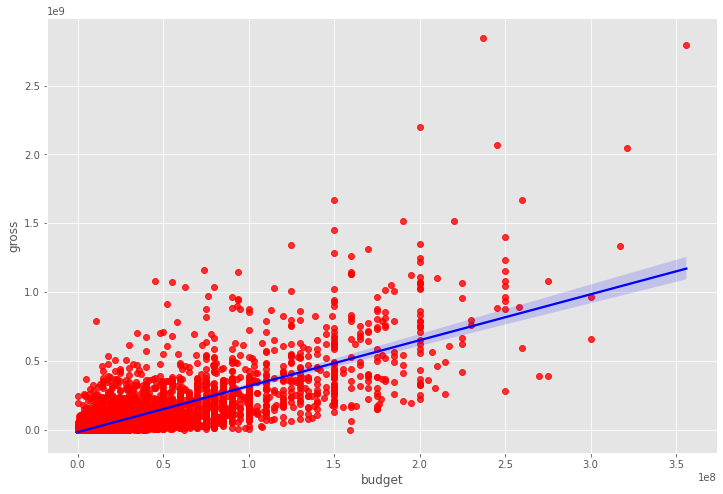

In [12]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [13]:
# looking at coorelations 

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


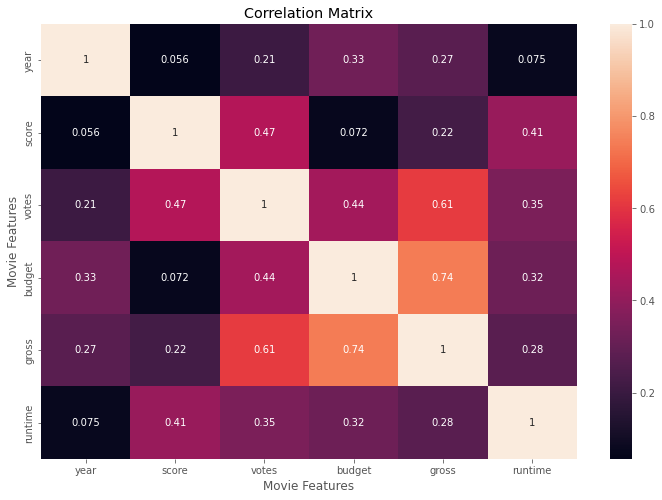

In [14]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [30]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [25]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


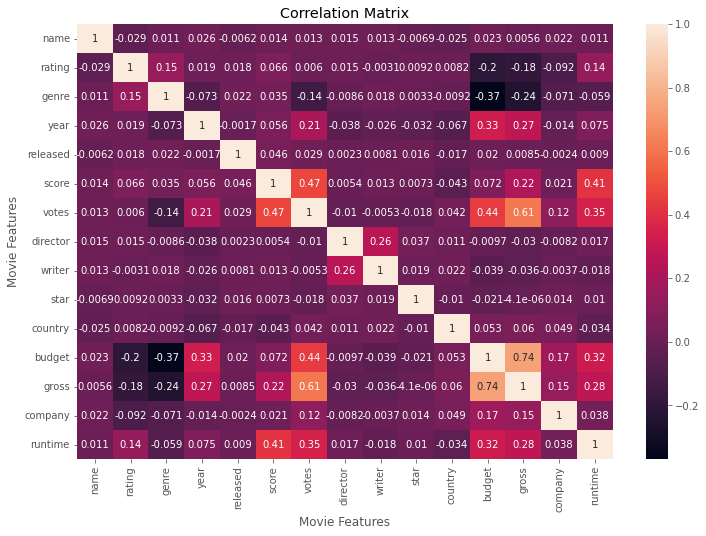

In [20]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [32]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [1]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

NameError: name 'df_numerized' is not defined

In [35]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [36]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings